# <font color='#FF5555'>**Mon premier neurone artificiel**</font>

Vous allez voir ici comment j'ai implémenté le travail effectué dans la partie 1.

## A. La structure du code

Nous allons utiliser un dataset de 100 lignes et 2 colonnes (donc 2 variables) pour réaliser le neurone énoncé au debut de ce NoteBook.

Il va falloir structurer notre code. Nous arons besoin de :
- une fonction d'initialisation :  
    &nbsp;    
    - initialiser paramètres W et b  
        &nbsp;  
&nbsp;  
- un algorithme itératif qui tourne en boucle :  
    &nbsp;  
    - fonction du modèle du neurone :  
        - fonction linéaire  
        - fonction d'activation  
        &nbsp;
    - fonction d'évalutation : 
    &nbsp;  
        - fonction coût
        - fonction calcul gradient  
        &nbsp;
    - fonction maj paramètres W et B

## B. Le train set (jeu de données)

Voici le train set que j'ai récupéré sur internet : 

In [1]:
#si les imports ne fonctionnent pas, décomentez ces prochaines lignes
#!pip install numpy
#!pip install matplotlib
# !pip install wheel
# !pip install scikit-learn

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

dimensions de X:  (100, 2)
dimensions de y:  (100, 1)


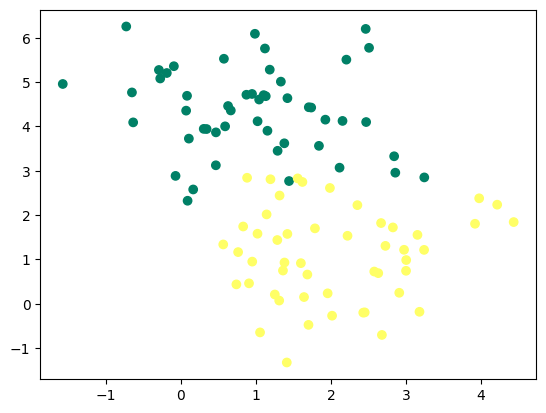

In [2]:
X, y  = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print('dimensions de X: ', X.shape)
print('dimensions de y: ', y.shape)

plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap='summer')
plt.show()


## C. L'implémentation des fonctions

Après quelques adaptations en python, voici avec quoi l'on se retrouve avec toutes nos fonction énumérées plus haut.

In [3]:
# FONCTION D'INITIALISATION
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [4]:
# FONCTION MODELE
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [5]:
# FONCTION COUT
def log_loss(A, y):
    return 1 / len(y) * np.sum( -y * np.log(A) - (1 - y) * np.log(1 - A))

In [8]:
# FONCTION CALCUL GRADIENT
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)    #jacobien
    db = 1 / len(y) * np.sum(A - y)
    return (dW,db)

In [10]:
# tests pour voir si tt fonctionne correctement
W, b = initialisation(X)
A = model(X, W, b)
log_loss(A, y)
dW, db = gradients(A, X, y)

In [11]:
# FONCTION MAJ DES PARAMETRES W, B
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [12]:
#FONCTION DONNANT LE TAUX DE REUSSITE
def predict(X, W, b):
    A = model(X, W, b)
    return A >= 0.5

In [13]:
#FONCTION IMPLEMENTANT NOTRE NEURONE DANS LA BOUCLE PRINCIPALE
def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100):
    
    # initialisation W, b
    W, b = initialisation(X)
    
    Loss = []
    
    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)
    
    y_pred = predict(X, W, b)
    print('taux de réussite : ',accuracy_score(y, y_pred))
    
    plt.plot(Loss)
    plt.show()
    
    return (W, b)

taux de réussite :  0.93


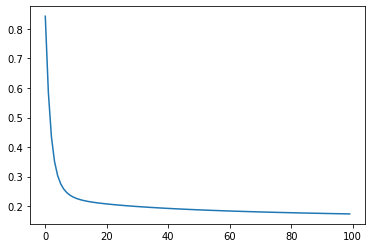

In [ ]:
W, b = artificial_neuron(X, y)

Ceci est notre courbe d'apprentissage : l'évolution des erreurs effectuées par le modèle, au fur et à mesure que celui ci apprend.  
Ici, les erreurs diminuent : l'algorithme fonctionne correctement.

## D. Test avec une nouvelle donnée (nouvelle plante)

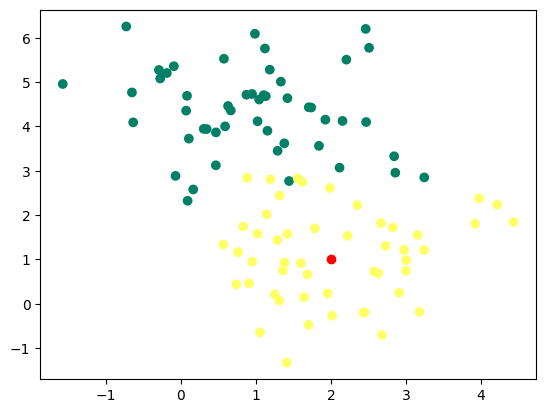

In [14]:
# nouvelle plante
new_plant = np.array([2,1])

plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap='summer')
plt.scatter(new_plant[0], new_plant[1], c='r')
plt.show()

Ici, on créé une nouvelle donnée, donc une plante (en rouge).  
Nous allons la donner à notre neurone pour savoir à quelle groupe elle appartient.

In [ ]:
predict(new_plant, W, b)

array([ True])

Notre neurone nous indique qu'elle est dans le groupe numéro 1, c'est-à-dire dans le groupe des plantes toxiques.  
Il a déterminé ce groupe grâce à une probabilité : 

In [ ]:
model(new_plant, W, b)

array([0.87432842])

On voit ici que la probabilité de notre plante à appartenir au groupe numéro 1 est d'environ 0.87.

Pour aller plus loin, on pourrait tracer la fontière de décision de notre neurone.

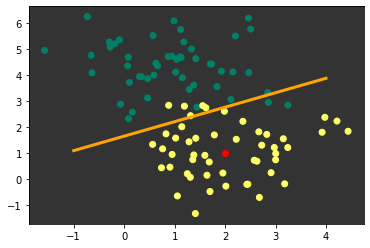

In [ ]:
new_plant = np.array([2,1])

x0 = np.linspace(-1, 4, 100)
x1 = ( -W[0] * x0 - b) / W[1]

plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap='summer')
plt.scatter(new_plant[0], new_plant[1], c='r')
plt.plot(x0, x1, c='orange', lw=3) #frontière de décision

plt.gca().set_facecolor((0.2,0.2,0.2))
plt.show()

Tout point étant au dessus de la ligne orange sera concidéré comme appartenant à la classe 0 (donc non-toxique).  
Inversement, tout point en dessous sera concidéré comme appartenant à la classe 1 (donc toxique).  
  
On peut compter à la main le nombre d'erreurs ici : 7

Le résultat est satisfaisant.  
Et si nous passions aux choses sérieuses ?  
Dans le prochain NoteBook, nous essayerons d'adapter ce modèle pour qu'il puisse prédire si une image donnée en entrée est une image de chien, ou de chat.